<a href="https://colab.research.google.com/github/journalWheat/CSI4106Project1-JaredWagner/blob/main/CSI4106Project1_JaredWagner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTHOR INFO
Intellectual property of JARED WAGNER, October 2022.

Project 1: CSI4106 (Introduction ot Artificial Intelligence), University of Ottawa, Fall Semester.

#What's in an airline?

The dataset I have chosen for this project contains customer satisfaction for travellers aboard an unnamed airline (which I shall refer to as "Fastway Air" for the purposes of this report.) Each sample contains data about the trip itself (e.g. how long the flight was delayed), some light demographic information (age and sex), and some evidently self-reported data from the customer rating different aspects of their trip.

My main focus parsing this data will be to create models which can accurately determine whether a customer was 'satisfied' or 'unsatisfied or neutral' with their trip, using the predictors I have available to me. Because there are only two categories under consideration, this is a binary classification problem.

Customer satisfaction is a valuable business metric. For Fastway Air, the ability to categorize a customer are 'satisfied' or not could impact how they change their internal business practices (to maximize satisfaction), or how they make it up to customers who they can predict were unhappy with their 8-hour trip to Europe with poor wifi service. In my own experience with SkipTheDishes -- a food delivery service -- my wrath has been suspended time after time when they succesfully predict my dissatisfaction with a 1-hour-over-estimated lag-time and send me an email to say "sorry for the wait! Here's $5 off."

# Analyzing the data

The following code snippets provide insight into the distribution of data. First, the data is imported from CSV to a Pandas DataFrame. Next, summary statistics for each column are printed. After that, histograms are generated to visually inspect the distribution of the data. Finally, each column is counted to check for null fields.

In [1]:
# https://datagy.io/histogram-python/ was used as a resource for initial data analysis

# importing relevant
import pandas as pd
import matplotlib.pyplot as plt
airline_raw_df = pd.read_csv('https://raw.githubusercontent.com/journalWheat/CSI4106Project1-JaredWagner/main/airline_passenger_satisfaction.csv')

In [2]:
# display stats for all numeric columns
print(airline_raw_df.describe())

          Unnamed: 0            age  flight_distance  inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64939.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         0.000000       7.000000        31.000000               0.000000   
25%     32469.750000      27.000000       414.000000               2.000000   
50%     64939.500000      40.000000       844.000000               3.000000   
75%     97409.250000      51.000000      1744.000000               4.000000   
max    129879.000000      85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min             

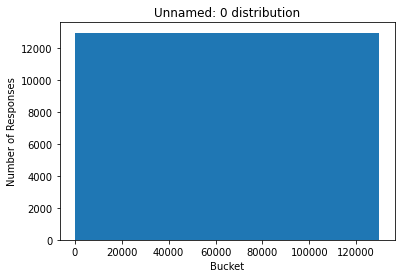

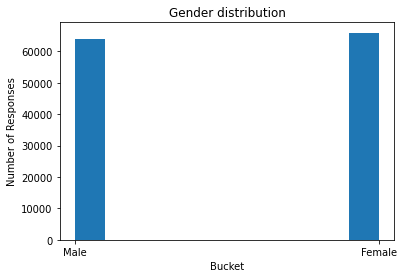

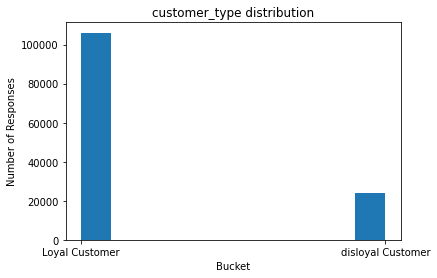

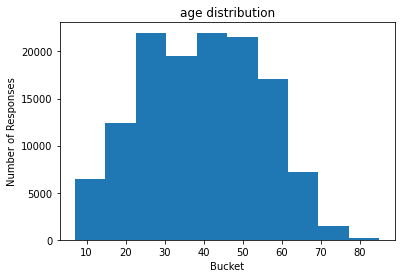

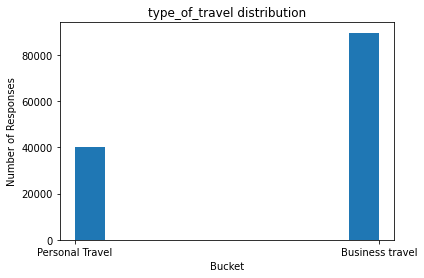

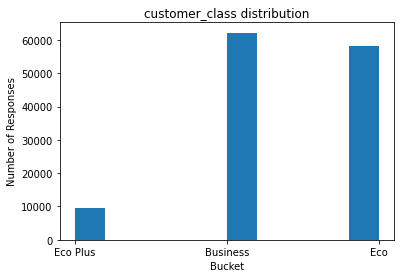

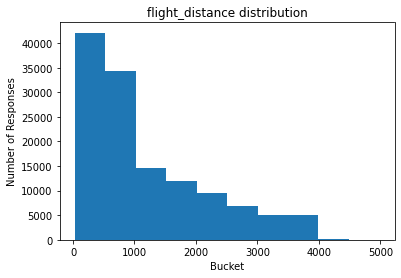

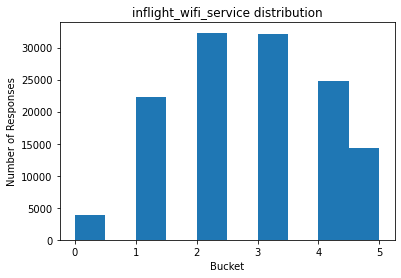

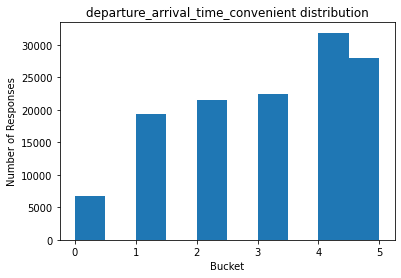

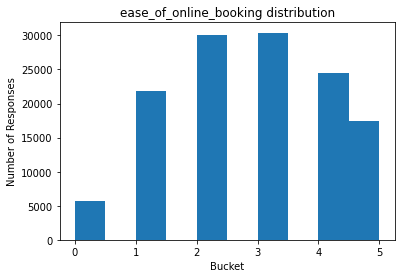

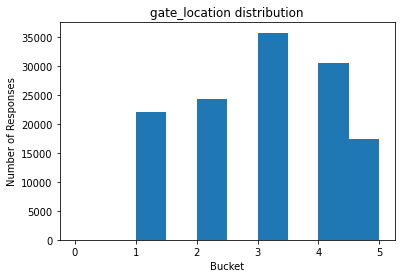

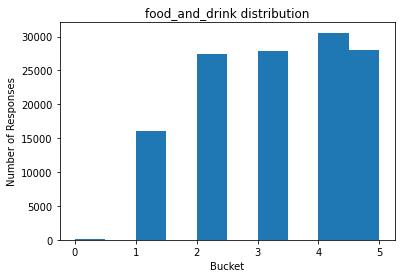

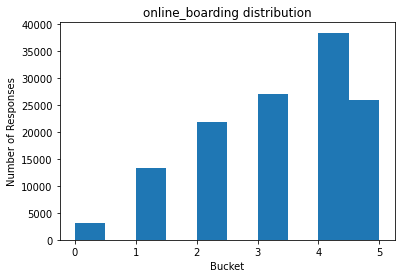

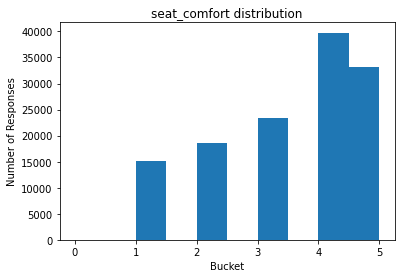

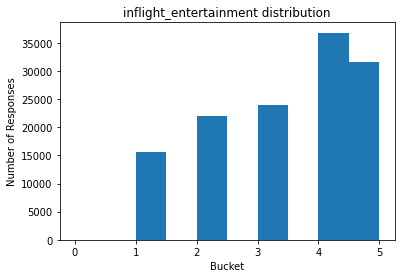

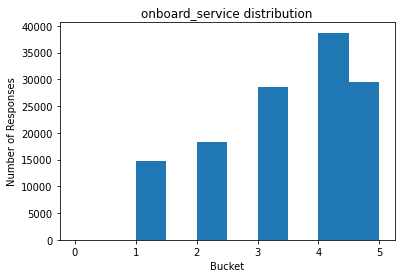

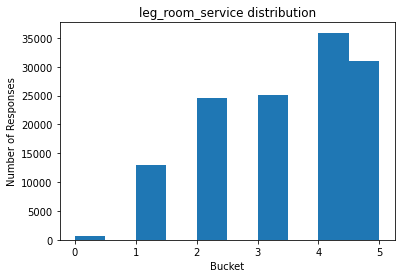

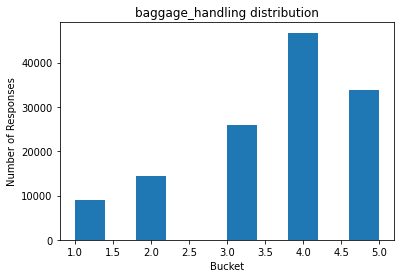

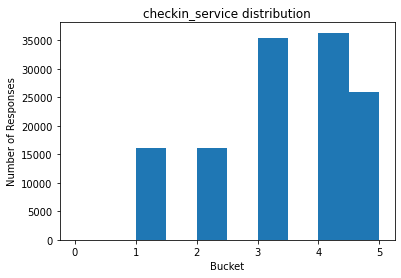

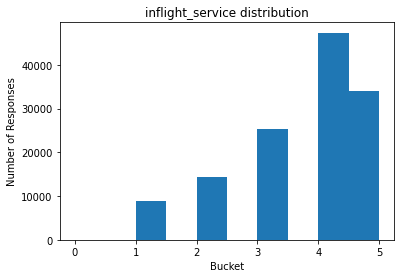

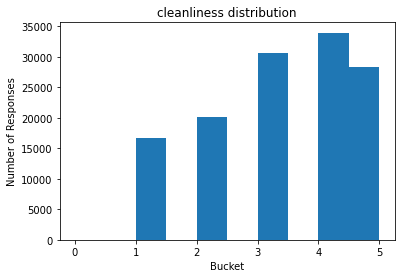

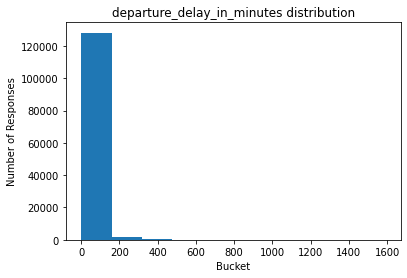

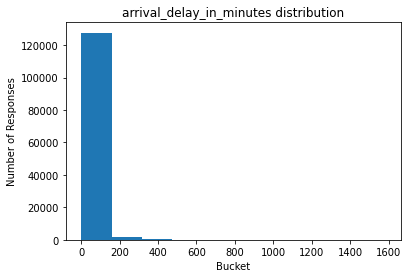

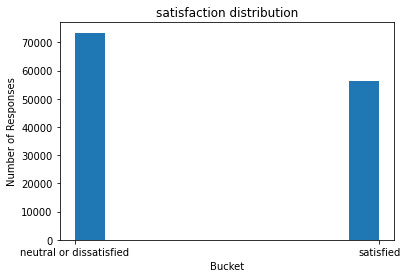

In [3]:
# display histograms for all columns
for column in airline_raw_df:
  plt.hist(airline_raw_df[column])
  plt.xlabel('Bucket')
  plt.ylabel('Number of Responses')
  plt.title(column + ' distribution')
  plt.show()

In [4]:
# count number of non-null responses in each column
airline_raw_df.count()

Unnamed: 0                           129880
Gender                               129880
customer_type                        129880
age                                  129880
type_of_travel                       129880
customer_class                       129880
flight_distance                      129880
inflight_wifi_service                129880
departure_arrival_time_convenient    129880
ease_of_online_booking               129880
gate_location                        129880
food_and_drink                       129880
online_boarding                      129880
seat_comfort                         129880
inflight_entertainment               129880
onboard_service                      129880
leg_room_service                     129880
baggage_handling                     129880
checkin_service                      129880
inflight_service                     129880
cleanliness                          129880
departure_delay_in_minutes           129880
arrival_delay_in_minutes        

From the information above, there are 129,880 samples and 22 features to select from. Only one feature has null values, 'arrival_dely_in_minutes,' but this will become irrelevant in the next section.

# Feature engineering

Building upon the last section, the initial startegy I employ is to only consider the self-reported metrics given by fliers. These are:
- inflight_wifi_service
- departure_arrival_time_convenient
- ease_of_online_booking
- gate_location
- food_and_drink
- online_boarding
- seat_comfort
- inflight_entertainment
- onboard_service
- baggage_handling
- checkin_service
- inflight_service
- cleanliness

The reason I choose this approach is because encoding these metrics will be easier later on. These metrics are similar, as they are all reported on a scale of 0-5 (where 0 indicates "non-applicable", and 1-5 is a rating of the service provided). Additionally, these features have no missing data (...although only 'arrival_delay_in_minutes' seems to have missing data anyway.)

This also reduces the number of features under consideration from 22 to just 13.

To examine these features further, they are copied into a new dataframe 'rf_df' ('response-features dataframe'), and responses of 0 are removed. The 'satisfaction' column is also modified so that data is presented in binary, where 1 indicates that the customer is satisfies and 0 indicates that the customer was neutral or dissatisfied. 

Finally, the analysis performed on the raw airline data is repeated.

In [5]:
# copying the features I care about to a new dataset
#'rf_df'='response features dataframe'
rf_df = airline_raw_df[['inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking','gate_location','food_and_drink','online_boarding','seat_comfort','inflight_entertainment','onboard_service','baggage_handling','checkin_service','inflight_service','cleanliness', 'satisfaction']].copy()

# remove 0s, reference: https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/
for column in rf_df:
  rf_df = rf_df.drop(rf_df[rf_df[column] == 0].index)

# transformation on 'satisfaction'
rf_df['satisfaction'] = rf_df['satisfaction'].replace({'satisfied':1,'neutral or dissatisfied':0})

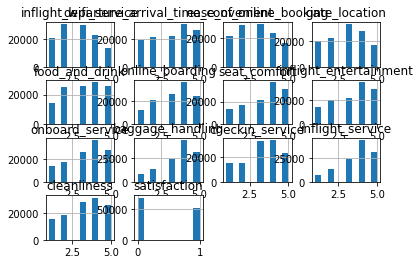

       inflight_wifi_service  departure_arrival_time_convenient  \
count          119567.000000                      119567.000000   
mean                2.817943                           3.206838   
std                 1.253511                           1.386886   
min                 1.000000                           1.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       ease_of_online_booking  gate_location  food_and_drink  online_boarding  \
count           119567.000000  119567.000000   119567.000000    119567.000000   
mean                 2.879172       2.986961        3.213788         3.330551   
std                  1.298754       1.282049        1.324438         1.263108   
min                  1.000000       1.000000        1.000000         1.0

In [6]:
rf_df.hist()
plt.show() # show a tight grid of histograms for the features under consideration

print(rf_df.describe()) # print data about the features under consideration

From here, I look for correlations between survey scores using a scatter matrix.

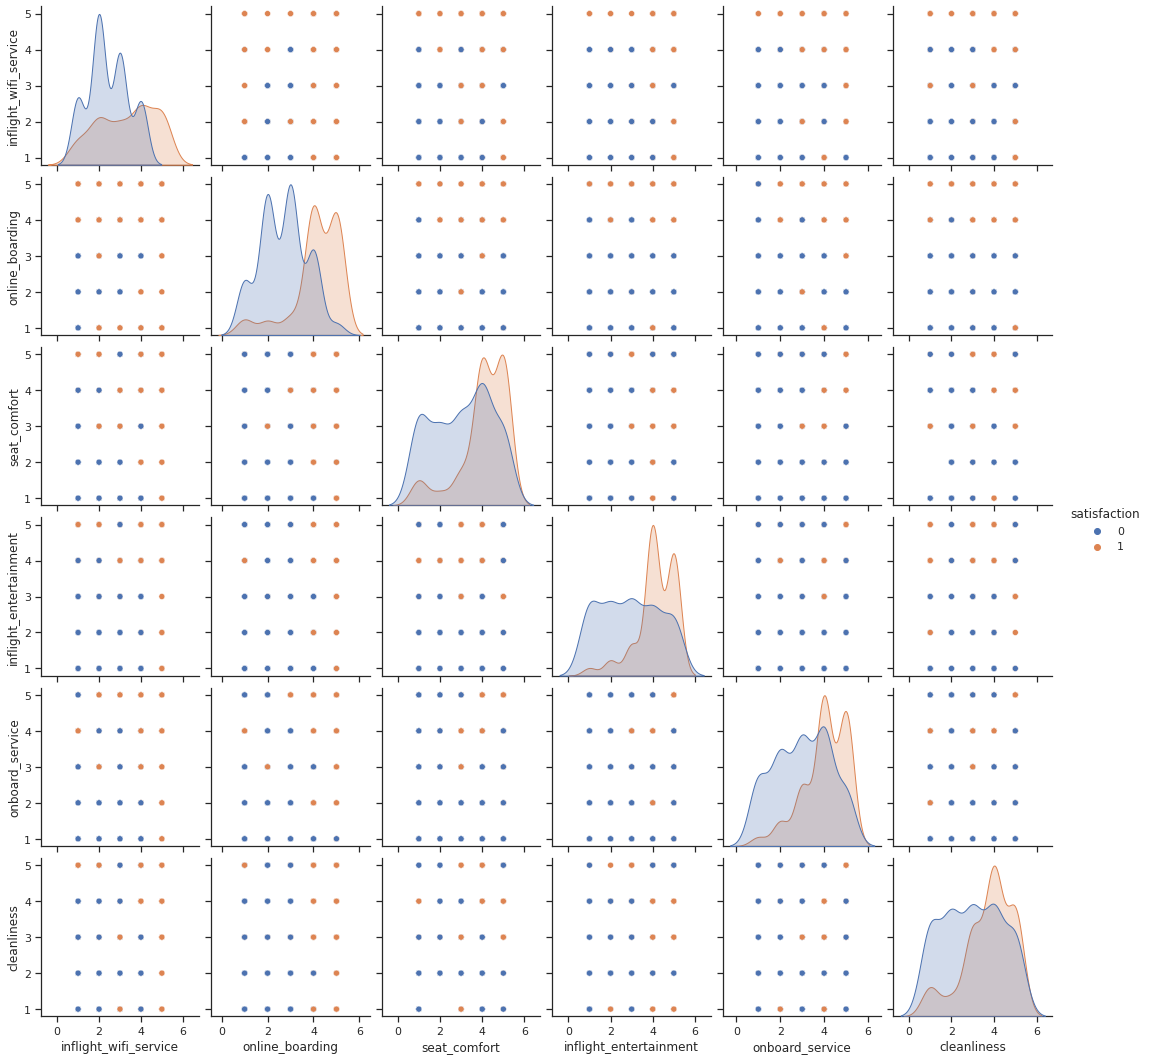

In [7]:
# resource used: http://seaborn.pydata.org/examples/scatterplot_matrix.html
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(rf_df[['inflight_wifi_service','online_boarding','seat_comfort','inflight_entertainment','onboard_service','cleanliness','satisfaction']][0:400],hue='satisfaction')

Visually, the parameters with the lest overlap are:
- inflight_wifi_service
- online_boarding
- seat_comfort
- inflight_entertainment
- onboard_service
- cleanliness

Whereas other parameters (appearing in the next scatter matrix) have a lot of overlap between customers who are 'satisfied' or 'not satisfied.'

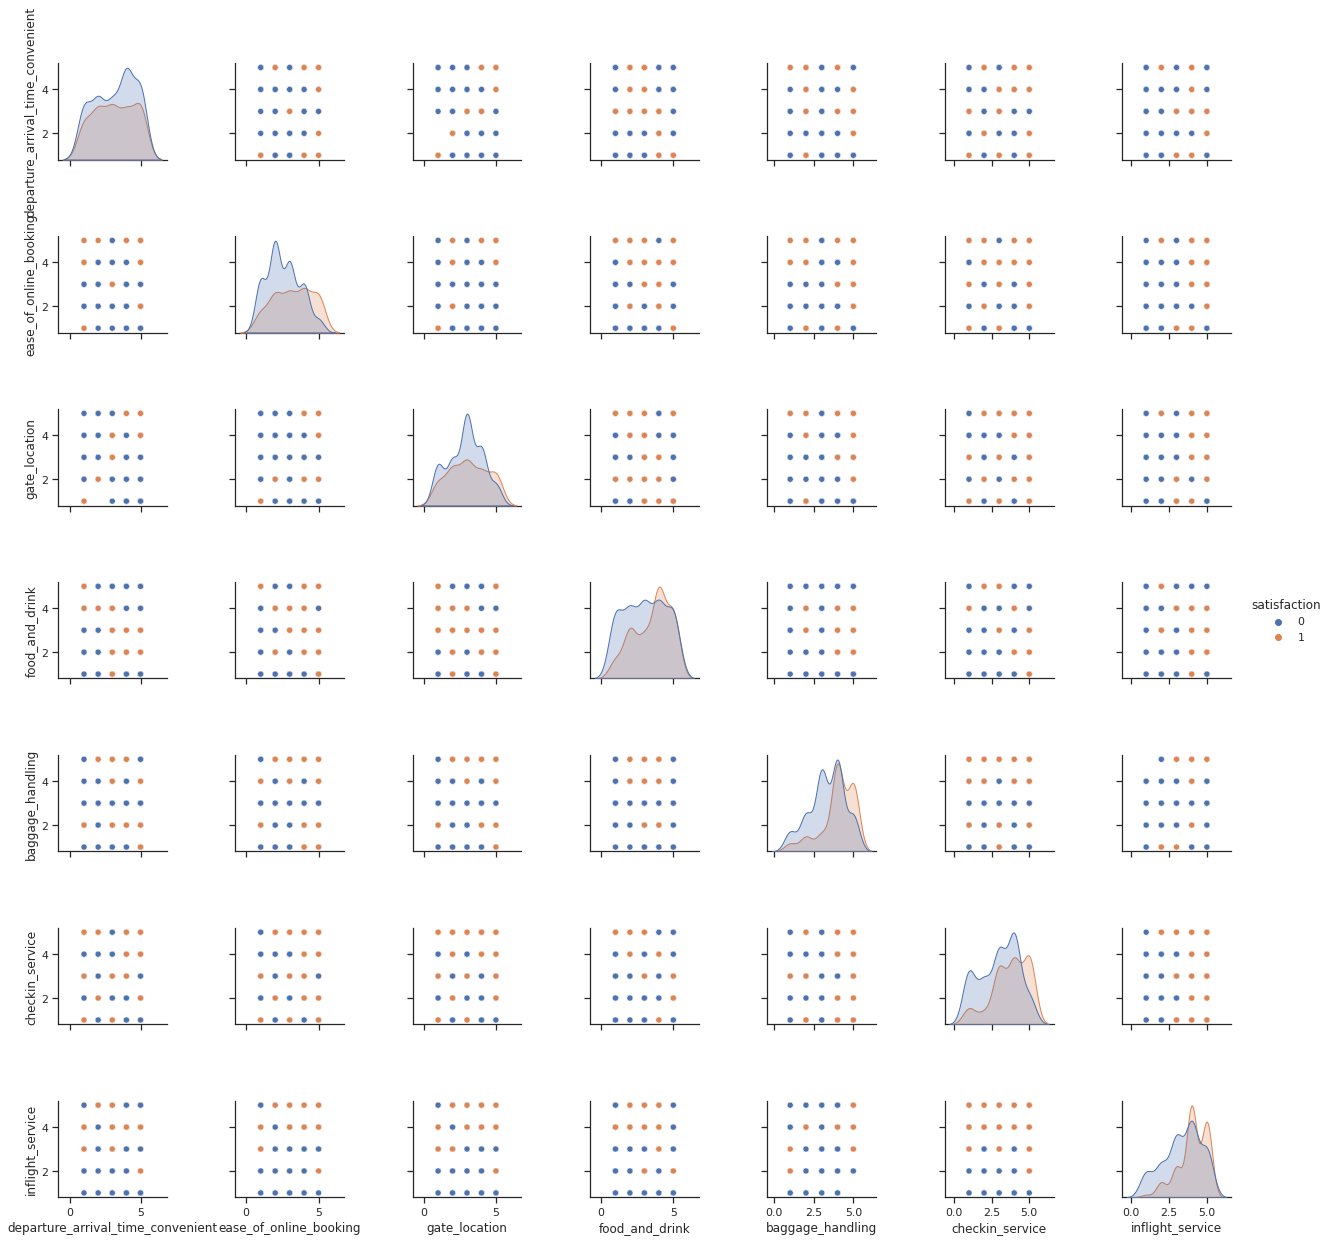

In [8]:
sns.pairplot(rf_df[['departure_arrival_time_convenient','ease_of_online_booking','gate_location','food_and_drink','baggage_handling','checkin_service','inflight_service', 'satisfaction']][0:400],hue='satisfaction')

Therefore, these extraneous features are discared.

In [9]:
rf_df = airline_raw_df[['inflight_wifi_service','online_boarding','seat_comfort','inflight_entertainment','onboard_service','cleanliness','satisfaction']].copy()

#Encoding

Encoding is tricky.

# Preparing for cross-validation
...blah blah blah

# Training Naive Bayes: Version 1
In this section, I'll train a Naive Bayes model using the details I have discussed up until the end of the section "Preparing for cross-validation."